# Assignment 8

To implement and analyze the SIFT (Scale-Invariant Feature Transform) feature
descriptor for detecting and describing keypoints in images, and to understand its application in image matching and object recognition.

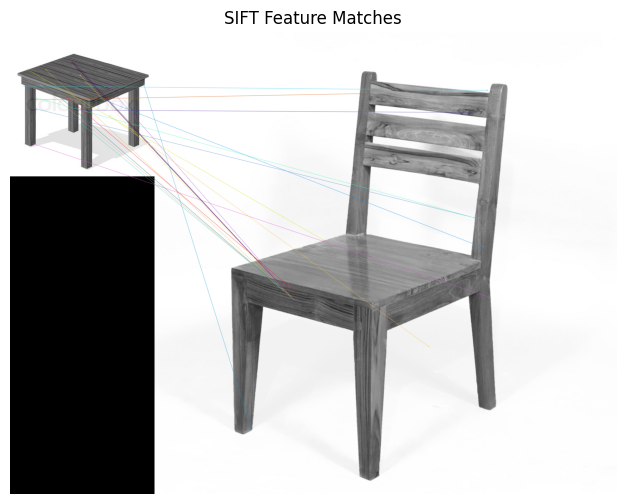

In [19]:
import cv2
import matplotlib.pyplot as plt

# ---------- Step 1: Load two images in grayscale ----------
img1 = cv2.imread('pic5.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pic6.jpg', cv2.IMREAD_GRAYSCALE)

# ---------- Step 2: Create SIFT detector ----------
sift = cv2.SIFT_create()

# ---------- Step 3: Detect keypoints and compute descriptors ----------
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# ---------- Step 4: Match features using BFMatcher ----------
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# ---------- Step 5: Apply ratio test to select good matches ----------
good_matches = [m for m,n in matches if m.distance < 0.75*n.distance]

# ---------- Step 6: Draw matches ----------
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# ---------- Step 7: Display result using Matplotlib ----------
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matches")
plt.axis('off')
plt.show()